In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
Data = pd.read_csv(r'C:\Users\abhes\OneDrive\Documents\train.csv')

In [50]:
Data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [51]:
Data1 = Data.isnull()
Data1.sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [52]:
Data.shape

(20800, 5)

In [53]:
Data = Data.dropna()
Data.isnull().any()

id        False
title     False
author    False
text      False
label     False
dtype: bool

In [42]:
Data.shape

(18285, 5)

In [8]:
X = Data.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
y = Data['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [10]:
y.unique()

array([1, 0], dtype=int64)

In [11]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional

In [13]:
vocabulary_size = 5000

In [14]:
messages = X.copy()
messages.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [15]:
messages.reset_index(inplace= True)

<AxesSubplot: >

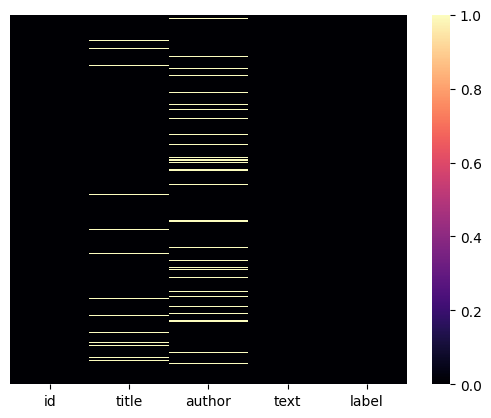

In [55]:
sns.heatmap(Data1,yticklabels=False,cmap='magma')

In [16]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [17]:
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

In [18]:
corpus =[]
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review =review.lower()
    review = review.split()
    
    review = [stemmer.stem(words) for words in review if not words in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [20]:
one_hot_rep = [one_hot(words,vocabulary_size)for words in corpus]
one_hot_rep[1]

[2298, 1348, 1705, 4863, 1761, 2875, 403]

In [21]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [22]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_rep,padding='pre',maxlen=sent_length)
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2298, 1348, 1705, 4863, 1761, 2875,  403])

In [23]:
embedded_vector_length = 40
model = Sequential()
model.add(Embedding(vocabulary_size,embedded_vector_length,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10


383/383 [==============================] - 22s 33ms/step - loss: 0.2539 - accuracy: 0.8905 - val_loss: 0.2058 - val_accuracy: 0.9130
Epoch 2/10
383/383 [==============================] - 11s 29ms/step - loss: 0.1406 - accuracy: 0.9458 - val_loss: 0.2256 - val_accuracy: 0.9107
Epoch 3/10
383/383 [==============================] - 11s 29ms/step - loss: 0.1019 - accuracy: 0.9620 - val_loss: 0.2388 - val_accuracy: 0.9099
Epoch 4/10
383/383 [==============================] - 11s 28ms/step - loss: 0.0665 - accuracy: 0.9757 - val_loss: 0.3002 - val_accuracy: 0.9097
Epoch 5/10
383/383 [==============================] - 11s 29ms/step - loss: 0.0398 - accuracy: 0.9864 - val_loss: 0.3521 - val_accuracy: 0.9085
Epoch 6/10
383/383 [==============================] - 11s 28ms/step - loss: 0.0266 - accuracy: 0.9924 - val_loss: 0.3758 - val_accuracy: 0.9114
Epoch 7/10
383/383 [==============================] - 11s 29ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.4615 - val_accurac

In [27]:
pred = model.predict(X_test)

189/189 [==============================] - 3s 9ms/step


In [28]:
prediction = np.where(pred > 0.5 ,1,0)
prediction

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [30]:
accuracy_score(y_test,prediction)

0.9060480530240265

In [31]:
conf =confusion_matrix(y_test,prediction)
conf

array([[3136,  283],
       [ 284, 2332]], dtype=int64)

<AxesSubplot: >

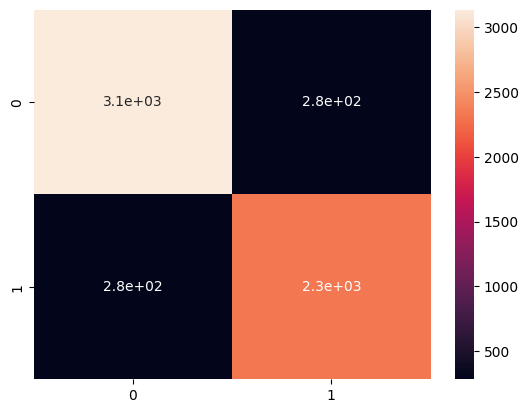

In [32]:
sns.heatmap(conf,annot = True)

In [33]:
model.get_weights()

[array([[-0.01822791,  0.02040335,  0.00425059, ...,  0.07166259,
          0.02652715,  0.00315537],
        [ 0.04220176, -0.01602215,  0.04542707, ..., -0.03524761,
         -0.07200371,  0.05244121],
        [ 0.01093481,  0.02750535, -0.04725743, ...,  0.04595771,
          0.02240266,  0.03176889],
        ...,
        [-0.0380472 ,  0.03571575, -0.0863342 , ...,  0.085358  ,
          0.07569785,  0.01057137],
        [-0.06269132,  0.04085053, -0.00549887, ...,  0.04427844,
          0.05236811, -0.04143379],
        [ 0.01002786,  0.00320496,  0.06390898, ..., -0.02410278,
         -0.03818805,  0.0540551 ]], dtype=float32),
 array([[ 0.11730128,  0.06764687, -0.11109775, ..., -0.01086557,
         -0.07393669,  0.12311644],
        [-0.16291879,  0.028603  ,  0.04123345, ...,  0.05746225,
         -0.04643025, -0.06818784],
        [ 0.13230966, -0.04201217, -0.07047423, ...,  0.14267677,
          0.0122475 , -0.0977956 ],
        ...,
        [-0.03546879, -0.06458812, -0.1